In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
df = pd.read_csv('/content/weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [63]:
df.shape

(10000, 3)

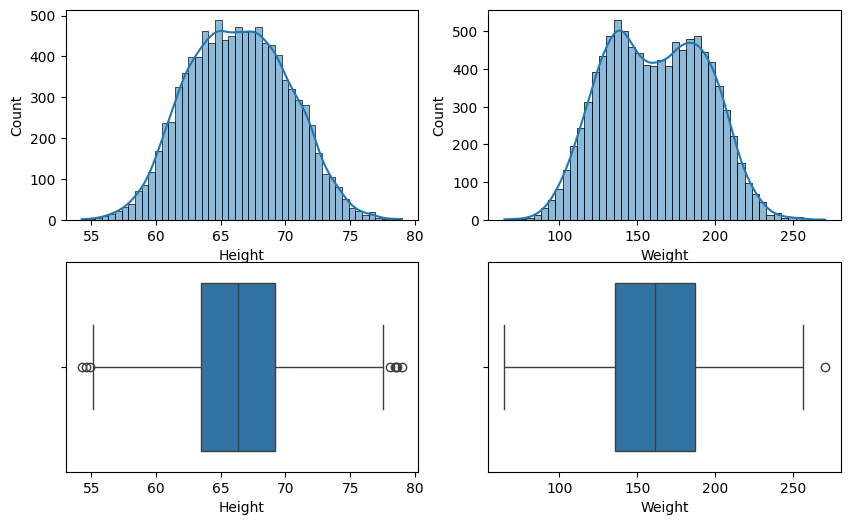

In [64]:
plt.figure(figsize=(10,6))
plt.subplot(221)
sns.histplot(df['Height'], kde=True)
plt.subplot(222)
sns.histplot(df['Weight'], kde=True)
plt.subplot(223)
sns.boxplot(df['Height'], orient='h')
plt.subplot(224)
sns.boxplot(df['Weight'], orient='h')
plt.show()

In [65]:
df['Height'].describe()

,Height
count,10000.000000
mean,66.367560
std,3.847528
min,54.263133
25%,63.505620
50%,66.318070
75%,69.174262
max,78.998742


In [66]:
upper_limit = df['Height'].quantile(0.99)
lower_limit = df['Height'].quantile(0.01)

In [67]:
df[(df['Height'] > upper_limit)]

,Gender,Height,Weight
23,Male,75.205974,228.761781
190,Male,76.709835,235.035419
197,Male,75.944460,231.924749
202,Male,75.140821,224.124271
215,Male,74.795375,232.635403
...,...,...,...
4565,Male,75.690384,223.587548
4569,Male,77.547186,242.041173
4701,Male,76.732446,241.686601
4721,Male,75.330847,240.440816


In [68]:
df[(df['Height'] < lower_limit)]

,Gender,Height,Weight
5026,Female,56.547975,84.872124
5074,Female,56.159458,90.815256
5122,Female,57.103869,93.506316
5123,Female,56.445685,96.640245
5162,Female,57.961936,112.226984
...,...,...,...
9761,Female,56.975279,90.341784
9825,Female,55.979198,85.417534
9895,Female,57.740192,93.652957
9904,Female,57.028857,101.202551


# Trimming

In [69]:
df_trim = df[(df['Height'] <= upper_limit) & (df['Height'] >= lower_limit)]
df_trim.shape

(9800, 3)

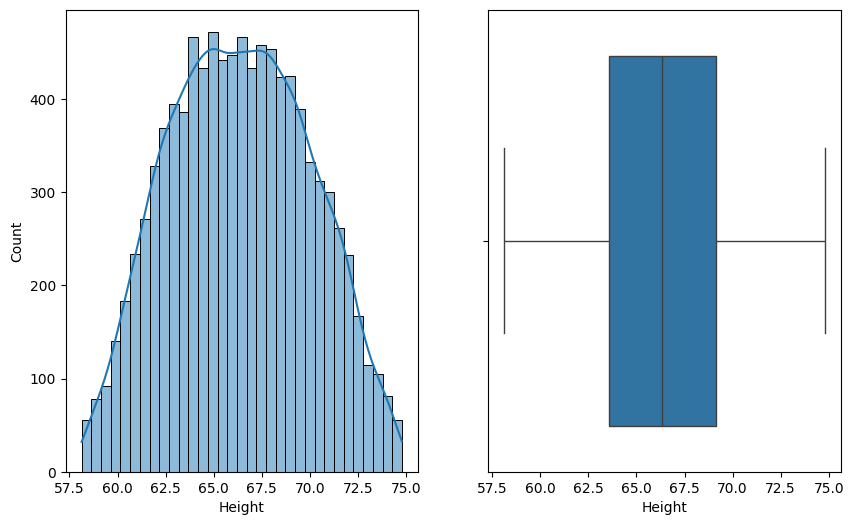

In [70]:
plt.figure(figsize=(10,6))
plt.subplot(121)
sns.histplot(df_trim['Height'], kde=True)
plt.subplot(122)
sns.boxplot(df_trim['Height'], orient='h')
plt.show()

# Capping

In [71]:
df_cap = df.copy()
df_cap['Height'] = np.where(df['Height'] >= upper_limit, upper_limit,
                  np.where(df['Height'] <= lower_limit, lower_limit, df['Height']))

In [72]:
df_cap.shape

(10000, 3)

In [73]:
df_cap.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


<Axes: xlabel='Height'>

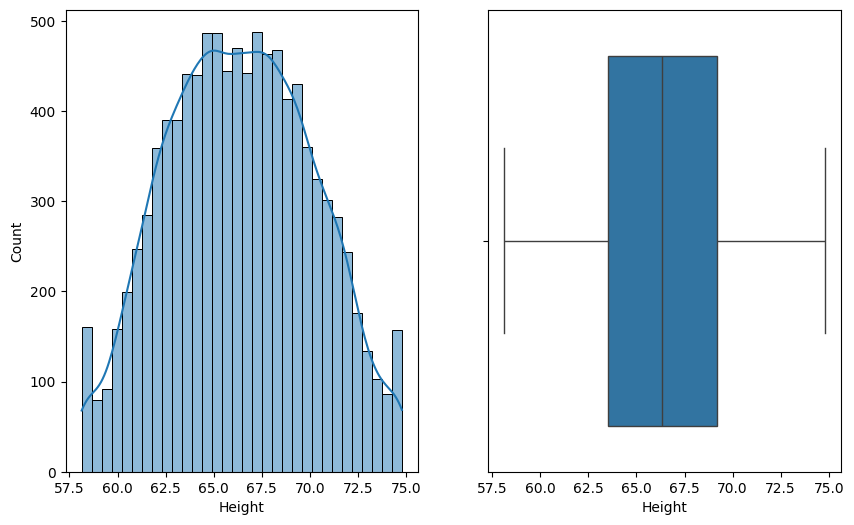

In [74]:
plt.figure(figsize=(10,6))
plt.subplot(121)
sns.histplot(df_cap['Height'], kde=True)
plt.subplot(122)
sns.boxplot(df_cap['Height'], orient='h')